In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# loading dataset

In [2]:
data = pd.read_csv('police.csv')

In [3]:
data.shape

(91741, 15)

In [4]:
data.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
data.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
data.dtypes


stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [7]:
data.tail(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91740,2015-12-31,22:46,NaN,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## 1. Remove the columns that only contains all missing values

In [8]:
data.drop('county_name', axis = 1, inplace = True)
# data.dropna(axis = 1, how = 'all') or del data.county_name

In [9]:
data.shape

(91741, 14)

# 2. Do men or women speed more often.

In [10]:
#my process
features = ['driver_gender', 'violation_raw']

In [11]:
df = data[features]

In [12]:
mask = df['violation_raw'] == 'Speeding'

In [13]:
df[mask].shape

(48463, 2)

In [14]:
new = df[mask]

In [15]:
new.groupby('driver_gender').count()

,violation_raw
driver_gender,
F,15482
M,32979


In [16]:
# other answer
data[data.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [17]:
data[data.driver_gender == 'M'].violation.value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [18]:
data[data.driver_gender == 'F'].violation.value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [19]:
data.groupby('driver_gender').violation.value_counts(normalize  = True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

# 3. Does gender affect who gets searched during a stop?

In [20]:
data.groupby('driver_gender').search_conducted.mean() * 100

driver_gender
F    2.003318
M    4.332618
Name: search_conducted, dtype: float64

# 4. Why is search_type missing so often?

In [21]:
data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [22]:
data.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [23]:
data.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Frisk                                    11
Incident to Arrest,Invent

In [24]:
data[data.search_conducted == False].search_type.value_counts( )

Series([], Name: search_type, dtype: int64)

# 5 During a search , how often is the driver frisked?

In [25]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [26]:
data['frisk'] = data.search_type.str.contains('Protective Frisk')

In [27]:
data.frisk

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
91736    NaN
91737    NaN
91738    NaN
91739    NaN
91740    NaN
Name: frisk, Length: 91741, dtype: object

In [28]:
data.frisk.value_counts(dropna = False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [29]:
data.frisk.mean()

0.08573216520650813

# 6. Which year had the least number of stops?

In [30]:
data.head(1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN


In [31]:
data.stop_date.str.slice(0,4).value_counts().sort_values(ascending = True).index[0]

'2005'

In [32]:
pd.to_datetime(data.stop_date)

0       2005-01-02
1       2005-01-18
2       2005-01-23
3       2005-02-20
4       2005-03-14
           ...    
91736   2015-12-31
91737   2015-12-31
91738   2015-12-31
91739   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 91741, dtype: datetime64[ns]

In [34]:
combined = data.stop_date.str.cat(data.stop_time, sep = ' ')

In [35]:
data['stop_datetime'] = pd.to_datetime(combined)

In [36]:
data.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [37]:
data.stop_datetime.dt.year.value_counts().sort_values(ascending = False ).index[-1]

2005

In [38]:
new = pd.DataFrame({'a': [np.nan, 22, 32,33,23,23,np.nan], 'b': [np.nan, np.nan, 44, 43,23,33,np.nan]})

# how does the drug activity change by time of day

In [39]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00


In [55]:
data['hour'] = data.stop_datetime.dt.time

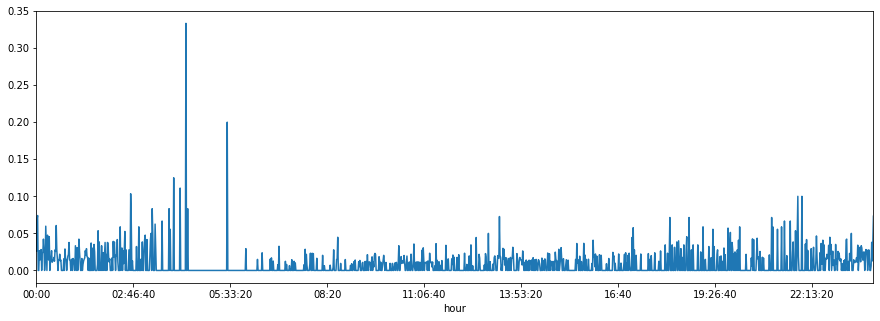

In [58]:
plt.figure(figsize = (15,5))
data.groupby('hour').drugs_related_stop.mean().plot()
plt.show()

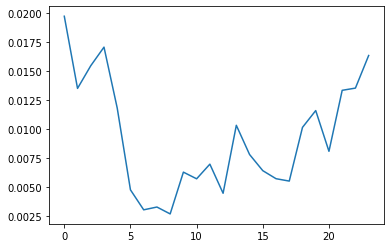

In [63]:
plt.plot(data.groupby(data.stop_datetime.dt.hour).drugs_related_stop.mean())

# 8. do most stop occur at night?

In [75]:
data[(data.stop_datetime.dt.hour > 4 ) & (data.stop_datetime.dt.hour < 22)].shape

(68575, 17)

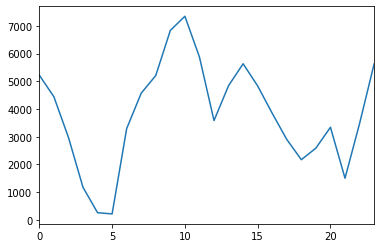

In [72]:
data.stop_datetime.dt.hour.value_counts().sort_index(ascending = False).plot()

# 9 Find the bad data in stop_duration column and fix it.

In [77]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,hour
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,01:55:00
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,08:15:00
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,23:15:00
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,17:15:00
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,10:00:00


In [85]:
data.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [87]:
mask =(data['stop_duration'] == '1' )| (data['stop_duration'] == '2')

In [90]:
data[mask] = np.nan

In [92]:
data.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64